# 2d cross-correlation

For continuous function the cc is defined as follows
$$ (f\star g)(\tau)=\int_{-\infty}^{\infty} f(t)^{*}g(t+\tau)\;dt$$
for discrete functions we have 
$$ (f\star g)[n]=\sum_{k}f^*[k]g[k+n]$$
Use cross-correlation to find where a section of an image fits in the whole



In [1]:
from skimage import data, color
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import correlate2d
import numpy as np

## read img

In [2]:
img = data.astronaut()


## rgb to gray

In [5]:
img = color.rgb2gray(img)

## plot img

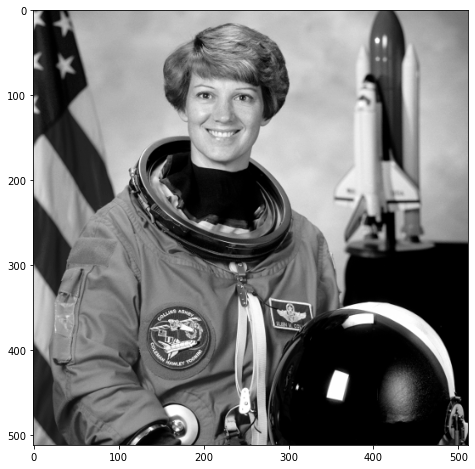

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

## select a rectangular section of the image (subimage)

In [7]:
xt1, xt2 = (14, 180)
yt1, yt2 = (150, 300)
template = img[xt1:xt2, yt1:yt2]

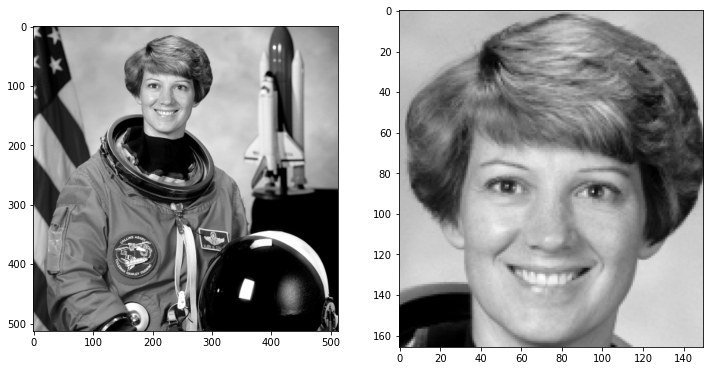

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(template, cmap=plt.cm.gray)
plt.show()

## Subtract the mean value so that there are roughly equal numbers of negative and positive values.

In [7]:
nimg = img - img.mean()
ntemplate = template - template.mean()

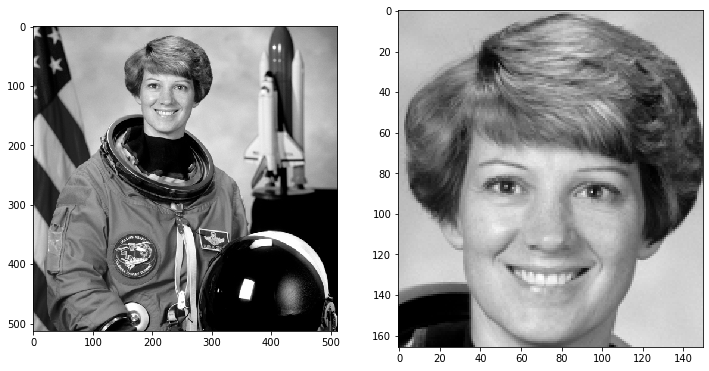

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(nimg, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(ntemplate, cmap=plt.cm.gray)
plt.show()

### calculate 2-D cross-correlation

In [9]:
# calculate sigma

In [10]:
n = template.size + img.size
sigma_img = img.std()
sigma_template = template.std()

In [11]:
# calculate correlation (mean substracted)

In [12]:
correlation = correlate2d(nimg, ntemplate, mode='same')

In [13]:
# normalize correlation

In [14]:
zncc = correlation/(n*sigma_img*sigma_template)

In [15]:
zncc

array([[-0.00316831, -0.0031403 , -0.00311024, ..., -0.00108356,
        -0.00103244, -0.00095676],
       [-0.00349811, -0.00349905, -0.00350916, ..., -0.00108547,
        -0.00103011, -0.0009532 ],
       [-0.00383249, -0.00386326, -0.00391093, ..., -0.00107585,
        -0.00101792, -0.0009423 ],
       ...,
       [ 0.0063569 ,  0.00610819,  0.00586431, ...,  0.00418739,
         0.00412841,  0.00406027],
       [ 0.00632774,  0.00608038,  0.00583335, ...,  0.00407712,
         0.00401349,  0.0039418 ],
       [ 0.0062737 ,  0.00602985,  0.00578204, ...,  0.00399096,
         0.00391516,  0.00382843]])

## plot 1d correlation

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(zncc, 'ob', markersize=0.1)
plt.show()

## plot 2d correlation

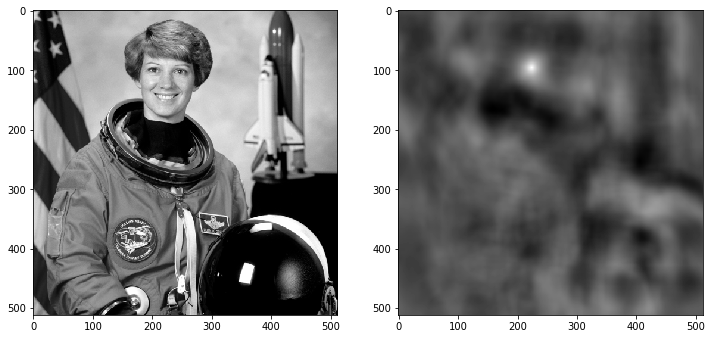

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(nimg, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(zncc, cmap=plt.cm.gray)
plt.show()

## The maximum of the cross-correlation corresponds to the estimated location of the center of the temlate image

In [18]:
# find maximum value of correlation

In [19]:
t_pos_x, t_pos_y = np.where(zncc == zncc.max())
t_pos_x, t_pos_y

(array([96], dtype=int64), array([224], dtype=int64))

In [20]:
# plot original img, correlation map and the maximum value of correlation

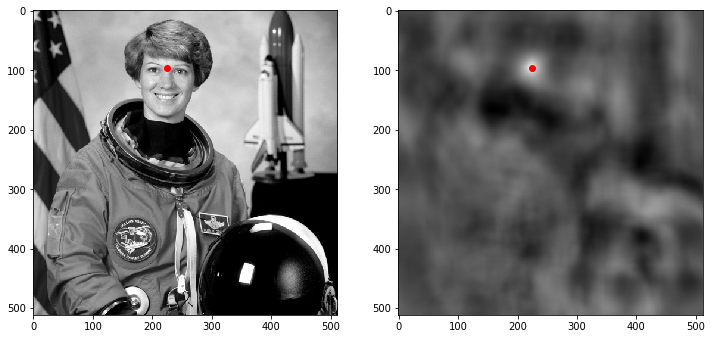

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(nimg, cmap=plt.cm.gray)
plt.plot(t_pos_y, t_pos_x, 'or')
plt.subplot(1,2,2)
plt.imshow(zncc, cmap=plt.cm.gray)
plt.plot(t_pos_y, t_pos_x, 'or')
plt.plot([])
plt.show()

## draw rectangle around the found subimage

In [22]:
# get size of template

In [23]:
height, width = ntemplate.shape
height, width

(166, 150)

In [24]:
# define left up corner of image

In [25]:
x_corner = t_pos_x - ntemplate.shape[0]/2
y_corner = t_pos_y - ntemplate.shape[1]/2
x_corner, y_corner

(array([13.]), array([149.]))

In [26]:
# create Rectangle object to plot

In [27]:
rect = Rectangle((y_corner, x_corner), width, height, linewidth=2, edgecolor='r', facecolor='none')

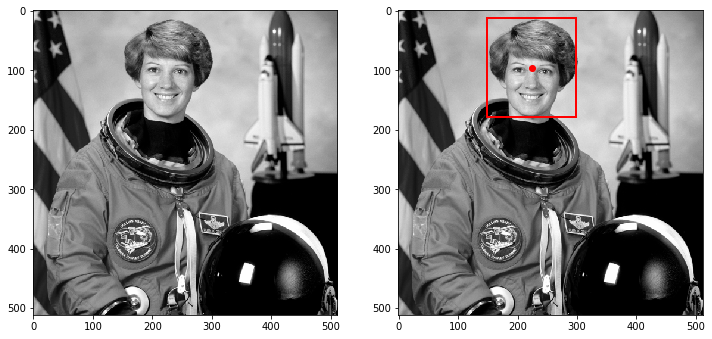

In [28]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img, cmap=plt.cm.gray)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img, cmap=plt.cm.gray)
ax2.add_patch(rect)
ax2.plot(t_pos_y, t_pos_x, 'or')
plt.show()

## Place the smaller image inside the larger image

In [29]:
img_wo_template = img.copy()
img_wo_template[xt1:xt2, yt1:yt2] = 1

In [30]:
img_aligned = img_wo_template.copy()
img_aligned[t_pos_x[0] - int(ntemplate.shape[0]/2):t_pos_x[0] + int(ntemplate.shape[0]/2),
            t_pos_y[0] - int(ntemplate.shape[1]/2):t_pos_y[0] + int(ntemplate.shape[1]/2)] = template

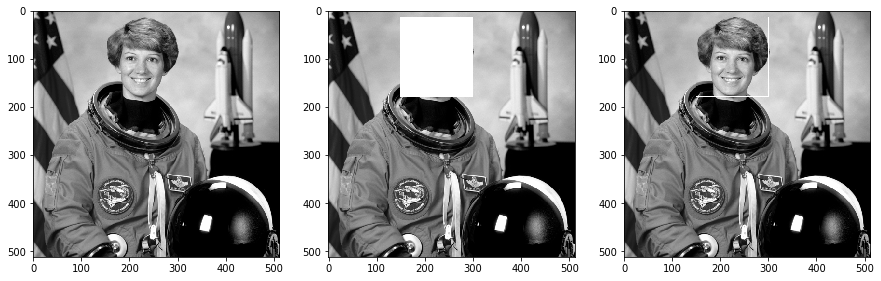

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(img_wo_template, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(img_aligned, cmap=plt.cm.gray)
plt.show()